In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
df.shape

(1599, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# describing the data so that we can make aassumption for skewness and outliers
#If mean value is greater than 50%(median) value then we can say the data skewed data present if we have high gap between 75 and max. then we can say the Data is having Outliers
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

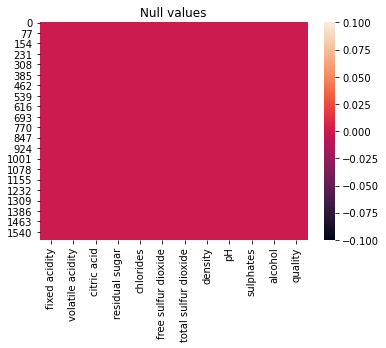

In [153]:
#verifying thorugh heatmap 
sns.heatmap(df.isnull())  #checking heatmap for null values
plt.title("Null values")
plt.show()

NO null values present in the dataset

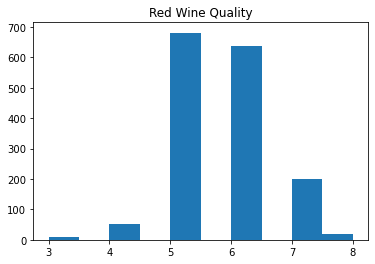

In [10]:
df["quality"].hist(grid=False)
plt.title("Red Wine Quality")
plt.show()

Here we can see most of the Red wine quality data we are having for quality range from 4 to 7
very less for 3 which is the lowest and 8 which is the highr=est quality

# checking outlier

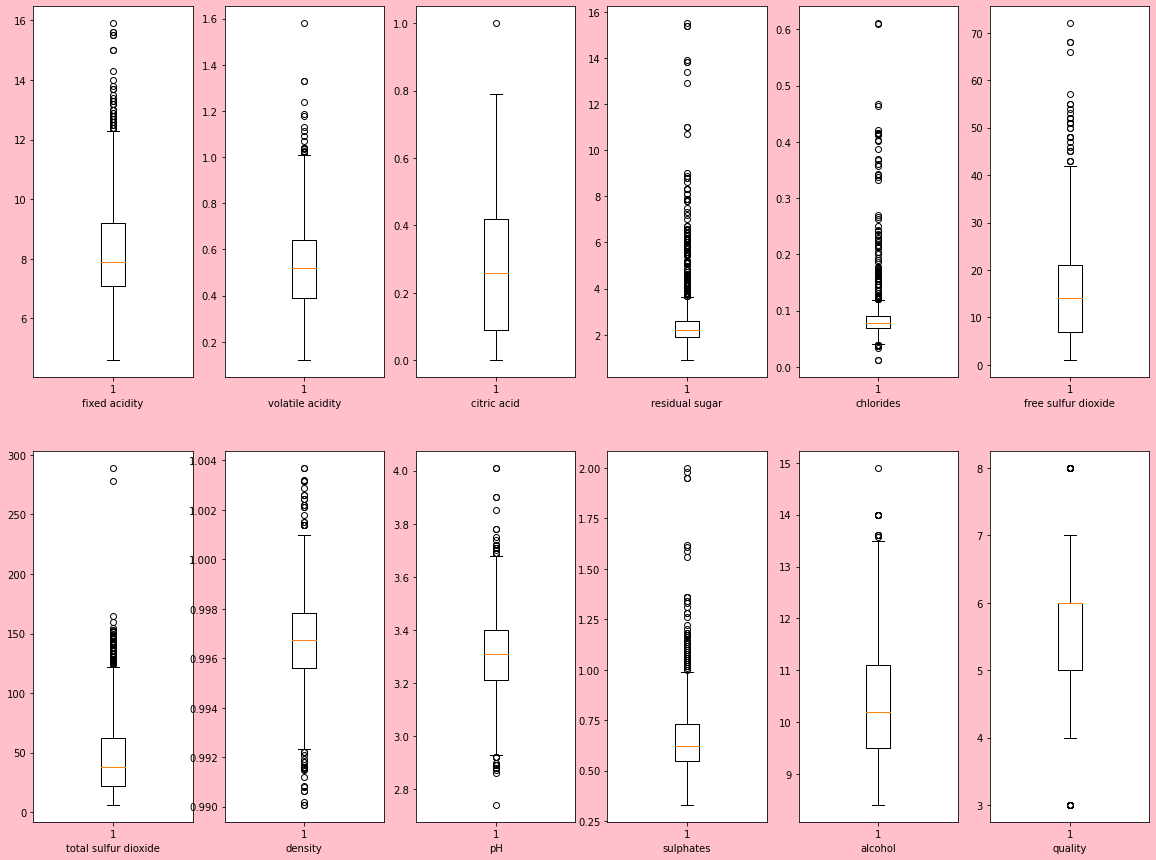

In [11]:
plt.figure(figsize=(20,15),facecolor='pink')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(2,6,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.show()

we can see some ouliers present in the columns

# checking skewness

In [13]:
df.skew().sort_values(ascending=False)

chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
volatile acidity        0.671593
citric acid             0.318337
quality                 0.217802
pH                      0.193683
density                 0.071288
dtype: float64

# Checking correlation

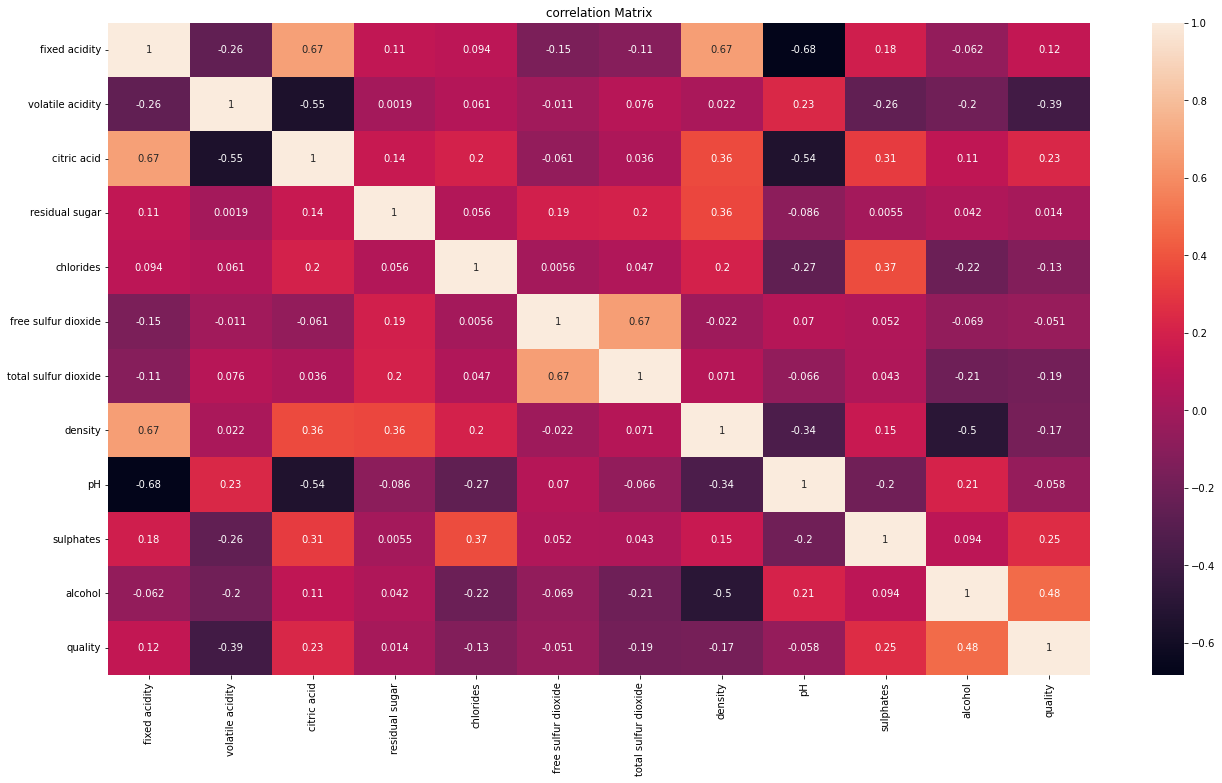

In [14]:
corr_mat=df.corr()#----------------> corelation function

plt.figure(figsize=[22,12])#-------> figure size dimetions
sns.heatmap(corr_mat,annot=True)#--> annot = true means will print values
plt.title("correlation Matrix")#---> title
plt.show()

To check which correlation with Output column, which are the columns having positive and  corelation with Output column

based on this we can judge the which are the coluns contribute more in positive way and negative direction

In [15]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# taking independent and target variable in x and Y before removing skewness and Outliers

In [16]:
x=df.drop("quality",axis=1)

In [17]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [19]:
#y=df['quality'].apply(lambda y_value: 1 if y_value>=7 else( 2 if y_value>=4 and y_value<=6 else 0)  )
y=df['quality']

In [21]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Applying Decision Tree Algorithem as suggested in the problem statement without EDA

In [22]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(10,40):
    i1=i*0.010
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i1)
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=dt.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        #print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) #45 45

Best accuracy is 68.33333333333333 on Random state 15


In [23]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(1,500):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.11,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=dt.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        #print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) #1157(74.10)

Best accuracy is 74.43181818181817 on Random state 135


# Removing Outlier using z score

In [24]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))# abs will make it positive---> mod of x= x and -X---> if x=2 then mode of x=3 or x=-(-2)=2
z.shape

(1599, 12)

In [25]:
thresold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [26]:
df_new=df[(z<3).all(axis=1)]

To storing the data in new variale

In [27]:
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [28]:
x=df_new.drop("quality",axis=1)

In [29]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [30]:
y=df_new['quality']

In [31]:
y.unique()

array([5, 6, 7, 4, 8], dtype=int64)

In [32]:
#To get best Test size number from 1 to 40%

import sklearn
from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(1,40):
    i1=i*0.010
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i1)
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=dt.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        #print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) #45 45

Best accuracy is 80.0 on Random state 1


In [33]:
#To get best random_state from 1 to 40

import sklearn
from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.10,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=dt.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        #print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) #1157(74.10)

Best accuracy is 74.65753424657534 on Random state 18


# Removing Skewness using Power Transform

After removing Skewness the accuracy is getting impacted below 75% hence neglating the step

In [34]:
#x.skew().sort_values(ascending=False)

Two way to check Skewness

If Mean > 50%
df.skew()
Hence above we can see the standard Error,Trust having High skewed Data

and Generosity and Family having low skewed Data.

In [35]:
#from sklearn.preprocessing import power_transform
#x1=power_transform(x)

In [36]:
#pd.DataFrame(x1).skew().sort_values(ascending=False)

In [37]:
#pd.DataFrame(x1, columns = x.columns).skew().sort_values(ascending=False)

In [38]:
#x=pd.DataFrame(x1,columns=x.columns)

In [39]:
#x.skew().sort_values(ascending=False)

In [40]:
#y=df_new['quality']

# Final Model selection 

In [164]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.10,random_state=18)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1305, 11)
(146, 11)
(1305,)
(146,)


In [165]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [166]:
dt.score(x_train,y_train)

1.0

In [167]:
pred=dt.predict(x_test)

In [168]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7534246575342466
[[ 2  0  1  0  0]
 [ 3 50 11  1  0]
 [ 2  9 46  2  0]
 [ 0  0  4 12  1]
 [ 0  1  1  0  0]]
              precision    recall  f1-score   support

           4       0.29      0.67      0.40         3
           5       0.83      0.77      0.80        65
           6       0.73      0.78      0.75        59
           7       0.80      0.71      0.75        17
           8       0.00      0.00      0.00         2

    accuracy                           0.75       146
   macro avg       0.53      0.58      0.54       146
weighted avg       0.77      0.75      0.76       146



# Cross Validation

In [169]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt,x,y,cv=5)
print("Result for dt:",scr.mean())

Result for dt: 0.4645100130347197


# Hyper Parameter Tunning

In [170]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
#from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

parameters={'max_features':['auto','sqrt','log2'],
            'max_depth': [4,5,6,7,8],
            'criterion':['gini','entropy']}

In [171]:
#GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=9,scoring="accuracy")

GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}

In [172]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.7054794520547946

# saving the model in pickel format

In [173]:
import joblib
joblib.dump(GCV.best_estimator_,"Redwine1.pk1")

['Redwine1.pk1']

# Testing the one sample Data with Linear Regression (First row Data)

In [174]:
t=np.array([7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4]) 

In [175]:
t.shape

(11,)

In [176]:
t=t.reshape(1,-1)
t.shape

(1, 11)

In [177]:
dt.predict(t)

array([5], dtype=int64)